In [2]:
import pandas as pd

file_path = '/Users/mikhail/Data Science Projects/Data Scientist/4. Аналитика. Начальный уровень/07 ClickStream и воронка/click_stream3.xlsx'
df = pd.read_excel(file_path)

df.columns


Index([313593, '1_home_page', 2015-02-26 00:00:00, 'Desktop', 'Female'], dtype='object')

In [4]:
import pandas as pd

file_path = '/Users/mikhail/Data Science Projects/Data Scientist/4. Аналитика. Начальный уровень/07 ClickStream и воронка/click_stream3.xlsx'

df = pd.read_excel(file_path, header=None)
funnel = {}

for page in df[1]:
    if page not in funnel:
        funnel[page] = 1
    else:
        funnel[page] += 1

funnel


{'1_home_page': 90400,
 '2_search_page': 45200,
 '3_payment_page': 6030,
 '4_payment_confirmation_page': 452}

In [6]:
import pandas as pd

file_path = '/Users/mikhail/Data Science Projects/Data Scientist/4. Аналитика. Начальный уровень/07 ClickStream и воронка/click_stream3.xlsx'

df = pd.read_excel(file_path, header=None)
df[2] = pd.to_datetime(df[2])
df['month'] = df[2].dt.to_period('M')

df['month'].unique()


<PeriodArray>
['2015-02', '2015-03', '2015-01', '2015-04']
Length: 4, dtype: period[M]

In [7]:
funnels_by_month = {}

for month in df['month'].unique():
    monthly_data = df[df['month'] == month]  # фильтр только по месяцу
    
    funnel = {}
    
    for page in monthly_data[1]:  # колонка page
        if page not in funnel:
            funnel[page] = 1
        else:
            funnel[page] += 1
    
    funnels_by_month[month] = funnel

funnels_by_month


{Period('2015-02', 'M'): {'1_home_page': 22600,
  '2_search_page': 13687,
  '3_payment_page': 2412,
  '4_payment_confirmation_page': 173},
 Period('2015-03', 'M'): {'1_home_page': 22600,
  '2_search_page': 8879,
  '3_payment_page': 631,
  '4_payment_confirmation_page': 44},
 Period('2015-01', 'M'): {'1_home_page': 22600,
  '2_search_page': 13554,
  '3_payment_page': 2390,
  '4_payment_confirmation_page': 189},
 Period('2015-04', 'M'): {'1_home_page': 22600,
  '2_search_page': 9080,
  '3_payment_page': 597,
  '4_payment_confirmation_page': 46}}

In [13]:
import pandas as pd

df_funnels = pd.DataFrame(funnels_by_month)
df_funnels


,2015-02,2015-03,2015-01,2015-04
1_home_page,22600,22600,22600,22600
2_search_page,13687,8879,13554,9080
3_payment_page,2412,631,2390,597
4_payment_confirmation_page,173,44,189,46


In [14]:
df_funnels.head()
df_funnels.index
df_funnels.columns


PeriodIndex(['2015-02', '2015-03', '2015-01', '2015-04'], dtype='period[M]')

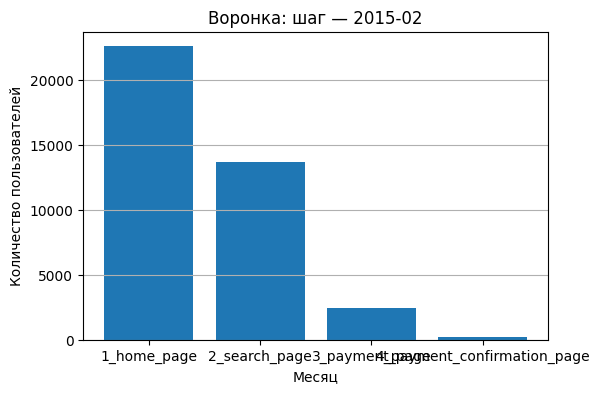

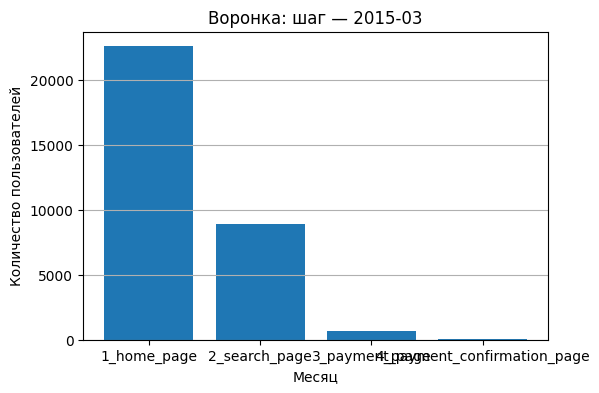

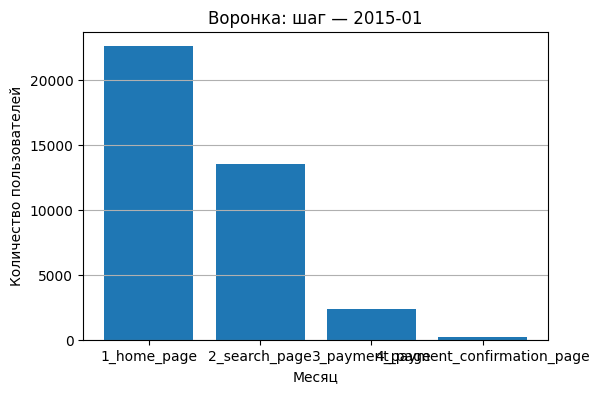

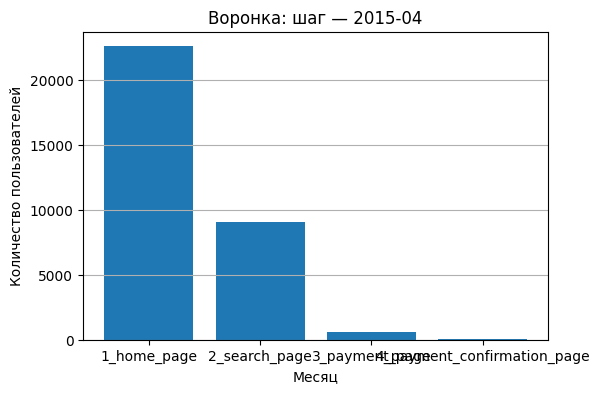

In [15]:
import matplotlib.pyplot as plt

# Перебираем шаги воронки — каждый столбец DataFrame
for step in df_funnels.columns:
    plt.figure(figsize=(6, 4))
    plt.bar(df_funnels.index.astype(str), df_funnels[step])
    plt.title(f'Воронка: шаг — {step}')
    plt.xlabel('Месяц')
    plt.ylabel('Количество пользователей')
    plt.grid(axis='y')
    plt.show()
